# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [110]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}
x1=data1[:,0]
y1=data1[:,1]
label1=data1[:,2]

x2=data2[:,0]
y2=data2[:,1]
label2=data2[:,2]

## plot the data

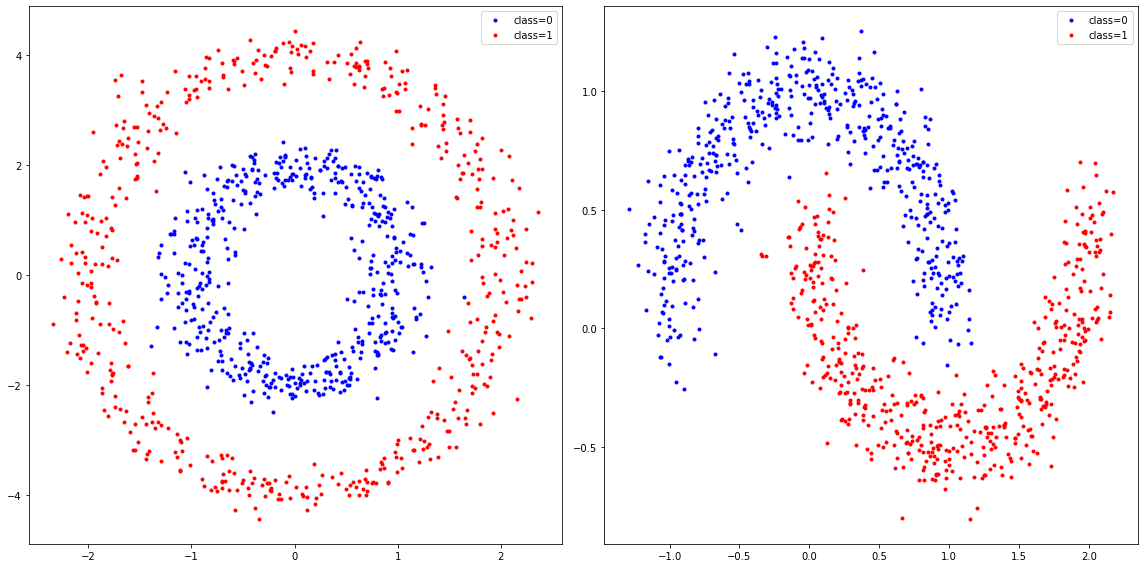

In [111]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
for i in range(len(label1)):
        if label1[i]==1:
            break
plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
plt.legend()
plt.tight_layout()
plt.subplot(1,2,2)
for i in range(len(label2)):
        if label2[i]==1:
            break
plt.plot(x2[:i],y2[:i], 'b.', label='class=0')
plt.plot(x2[i:],y2[i:], 'r.', label='class=1')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature function for each data to obtain the best accuracy

In [112]:
#shape 6*1000
def feature_function1(x, y):
    one=np.ones(len(x))
    feature = np.array(
        (one,x,y,x*y,x**2,y**2)).T
    return feature

In [197]:
#shape 10*1000
def feature_function2(x, y):
    one=np.ones(len(x))
    feature=np.array(
        (one,x,y,x*y,x**2,y**2,x*y**2,x**2*y,x**3,y**3)).T
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [198]:
#shape 1000*1
def regression_function(theta, feature):
    value=np.matmul(feature,theta)
    return value

## define sigmoid function with input $x$

In [199]:
def logistic_function(x):
    z=1/(1+np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [200]:

def compute_loss_feature(theta, feature, label):
    h=logistic_function(regression_function(theta,feature))
    loss=-1*label*np.log(h)-(1-label)*np.log(1-h)
    loss=loss.sum()/(len(label))
    return loss

## define gradient vector for the model parameters $\theta$

In [201]:
def compute_gradient_feature(theta, feature, label):
    h=logistic_function(regression_function(theta,feature))
    gradient=np.matmul(feature.T,(h-label))/ len(label)
    return gradient

## compute the accuracy

In [202]:
def compute_accuracy(theta, feature, label):
    h = logistic_function(regression_function(theta,feature))
    num_data = len(label)
    count=0
    for i in range(num_data):
        if h[i]>=0.5 and label[i] == 1:
            count+=1
        if h[i]<0.5 and label[i]==0:
            count+=1
    accuracy=count/num_data
    return accuracy

## gradient descent for the model parameters $\theta$

In [203]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
feature1=feature_function1(x1,y1)
feature2=feature_function2(x2,y2)

len1=feature1.shape[1]
len2=feature2.shape[1]

theta1=np.zeros((len1))
theta2=np.zeros((len2))


theta1_iteration=np.zeros((num_iteration, len1))
theta2_iteration=np.zeros((num_iteration,len2))

loss1_iteration=np.zeros(num_iteration)
loss2_iteration=np.zeros(num_iteration)

In [204]:
for i in range(num_iteration):
    theta1_final=theta1-learning_rate*compute_gradient_feature(theta1,feature1,label1)
    theta2_final=theta2-learning_rate*compute_gradient_feature(theta2,feature2,label2)
    loss1=compute_loss_feature(theta1, feature1, label1)
    loss2=compute_loss_feature(theta2, feature2, label2)
    theta1_iteration[i]=theta1
    theta2_iteration[i]=theta2
    loss1_iteration[i]=loss1
    loss2_iteration[i]=loss2
    theta1=theta1_final
    theta2=theta2_final
    if i%400==0:
        print("iteration = %4d, loss1 = %5.5f, loss2 = %5.5f" % (i, loss1, loss2))
theta1_optimal = theta1
theta2_optimal = theta2

iteration =    0, loss1 = 0.69315, loss2 = 0.69315
iteration =  400, loss1 = 0.04708, loss2 = 0.13718
iteration =  800, loss1 = 0.02792, loss2 = 0.09734
iteration = 1200, loss1 = 0.02104, loss2 = 0.07789
iteration = 1600, loss1 = 0.01742, loss2 = 0.06620
iteration = 2000, loss1 = 0.01517, loss2 = 0.05830
iteration = 2400, loss1 = 0.01362, loss2 = 0.05255
iteration = 2800, loss1 = 0.01248, loss2 = 0.04814
iteration = 3200, loss1 = 0.01160, loss2 = 0.04463
iteration = 3600, loss1 = 0.01091, loss2 = 0.04176
iteration = 4000, loss1 = 0.01034, loss2 = 0.03936
iteration = 4400, loss1 = 0.00987, loss2 = 0.03731
iteration = 4800, loss1 = 0.00946, loss2 = 0.03554
iteration = 5200, loss1 = 0.00912, loss2 = 0.03398
iteration = 5600, loss1 = 0.00882, loss2 = 0.03261
iteration = 6000, loss1 = 0.00855, loss2 = 0.03138
iteration = 6400, loss1 = 0.00832, loss2 = 0.03028
iteration = 6800, loss1 = 0.00811, loss2 = 0.02927
iteration = 7200, loss1 = 0.00792, loss2 = 0.02836
iteration = 7600, loss1 = 0.007

## compute accuracy of the classifiers

In [205]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)
print(accuracy_classifier1)
print(accuracy_classifier2)

0.999
0.997


## plot the results

In [206]:
def plot_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    plt.plot(range(len(loss_iteration)), loss_iteration, 'r-')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [207]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    x1=data[:,0]
    y1=data[:,1]
    label1=data[:,2]
    for i in range(len(label1)):
            if label1[i]==1:
                break
    plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
    plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
    plt.legend()
    plt.tight_layout()
  
    plt.show()

In [227]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
   
    plt.title('model parameter')
    rgb=['red','sienna','palegreen','crimson','indigo','cyan','forestgreen','darkviolet','gold','orange']
    for i in range(theta_iteration.T.shape[0]):
        plt.plot(theta_iteration.T[i], color=rgb[i], label='$\\theta_%d$' %i)
    plt.xlabel('iteration')
    plt.legend(loc='right')
    plt.tight_layout()
    plt.show()

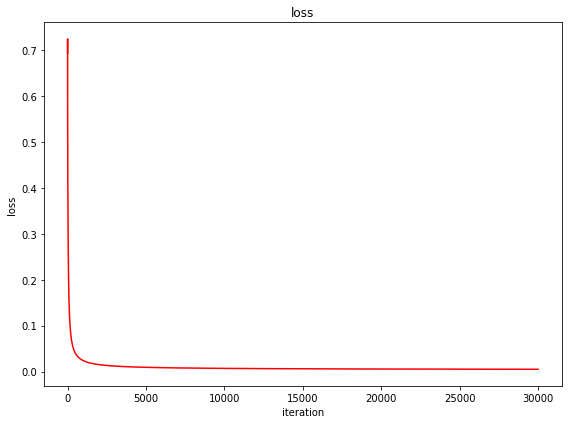

In [228]:
plot_loss_curve(loss1_iteration)

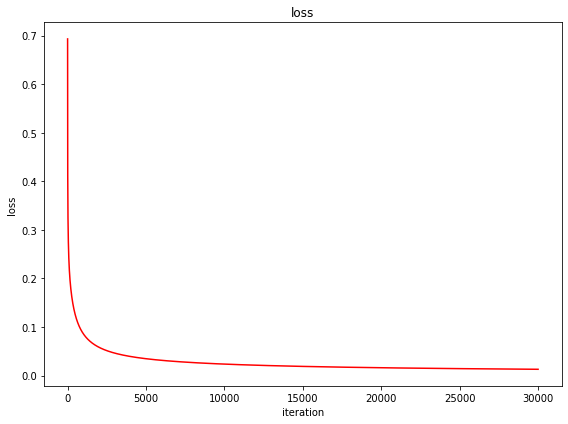

In [229]:
plot_loss_curve(loss2_iteration)

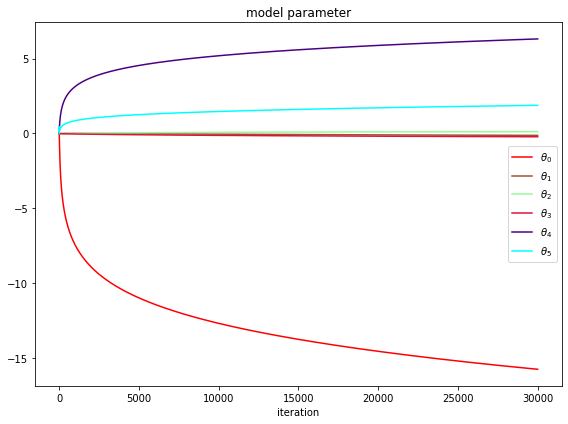

In [230]:
plot_model_parameter(theta1_iteration)

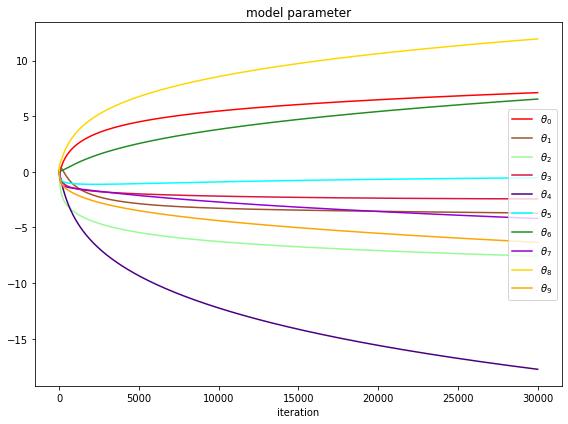

In [231]:
plot_model_parameter(theta2_iteration)

In [232]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    xx=np.arange(-3,3,0.1)
    yy=np.arange(-5,5,0.1)
    XX,YY=np.meshgrid(xx,yy)
    
    ZZ=theta[0]+theta[1]*XX+theta[2]*YY+theta[3]*XX*YY+theta[4]*XX**2+theta[5]*YY**2
    x1=data[:,0]
    y1=data[:,1]
    label1=data[:,2]
    for i in range(len(label1)):
        if label1[i]==1:
            break
  
    plt.contour(XX,YY,ZZ,'b-', levels=[0])
    plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
    plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
    plt.legend(loc='upper right')
    
    
    plt.tight_layout()
  
    plt.show()

In [233]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    xx=np.arange(-1.5,2.5,0.1)
    yy=np.arange(-1,1.5,0.1)
    XX,YY=np.meshgrid(xx,yy)
    ZZ=theta[0]+theta[1]*XX+theta[2]*YY+theta[3]*XX*YY+theta[4]*XX**2+theta[5]*YY**2+theta[6]*XX*YY**2+theta[7]*XX**2*YY+theta[8]*XX**3+theta[9]*YY**3
    x1=data[:,0]
    y1=data[:,1]
    label1=data[:,2]
    for i in range(len(label1)):
        if label1[i]==1:
            break
    plt.contour(XX,YY,ZZ,'b-', levels=[0])
    plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
    plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
    plt.legend(loc='upper right')
    
    
    plt.tight_layout()
  
    plt.show()

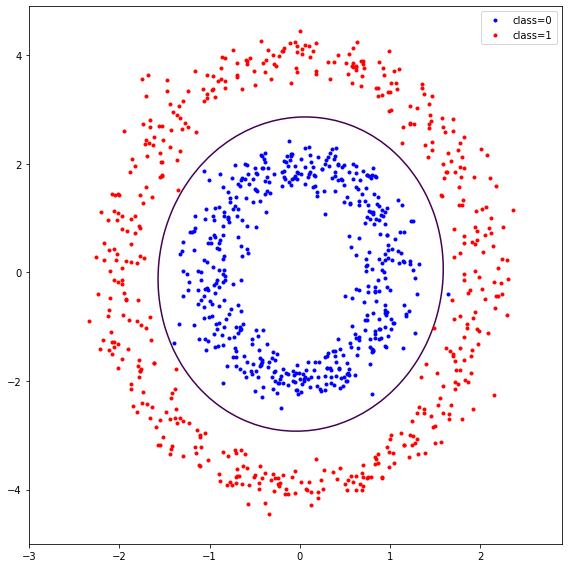

In [220]:
plot_classifier1(data1, theta1_optimal)

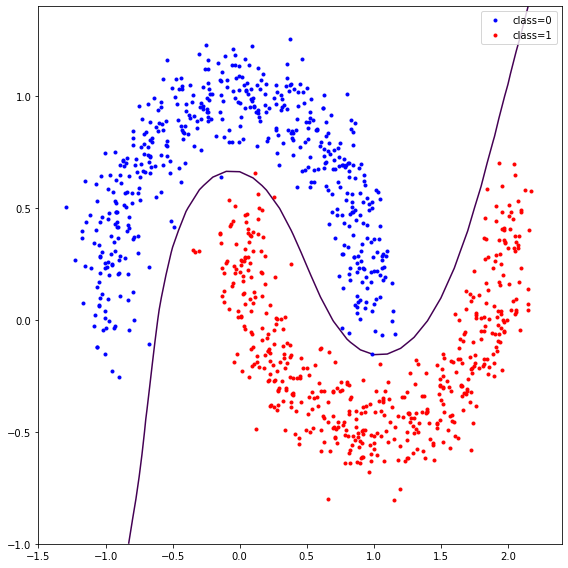

In [221]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

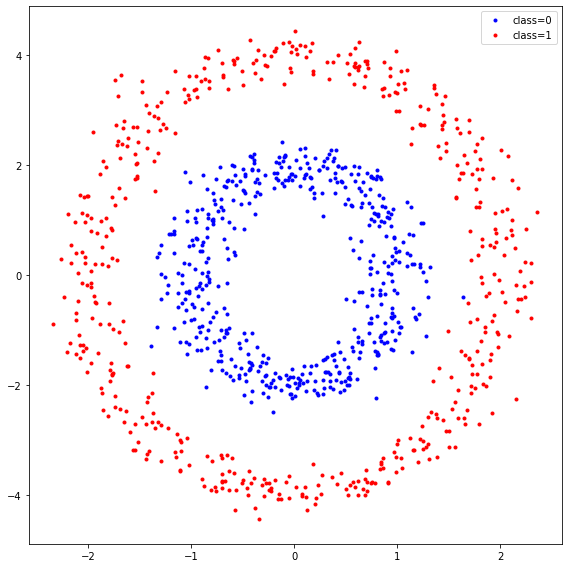

In [78]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

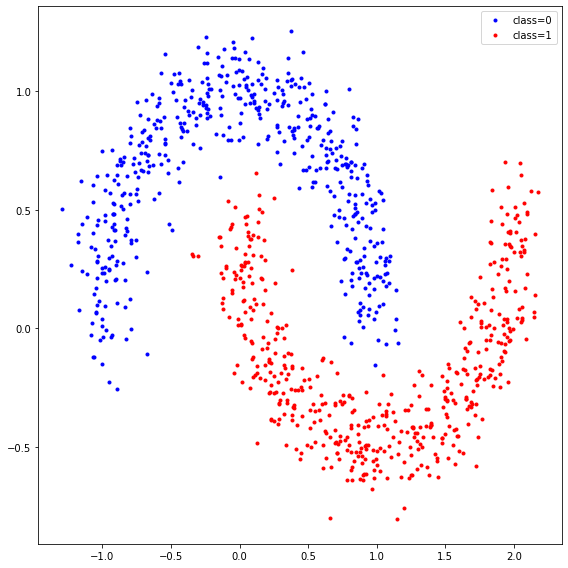

In [79]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

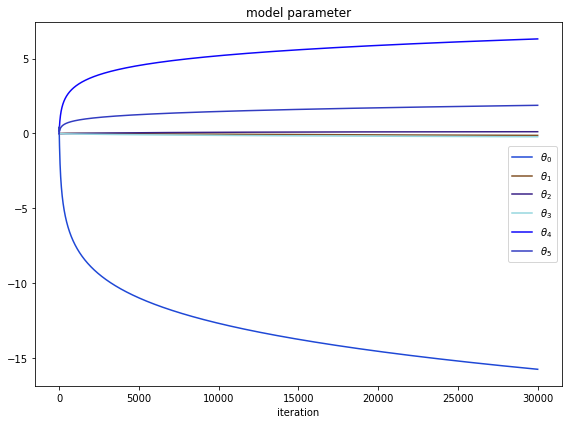

In [80]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

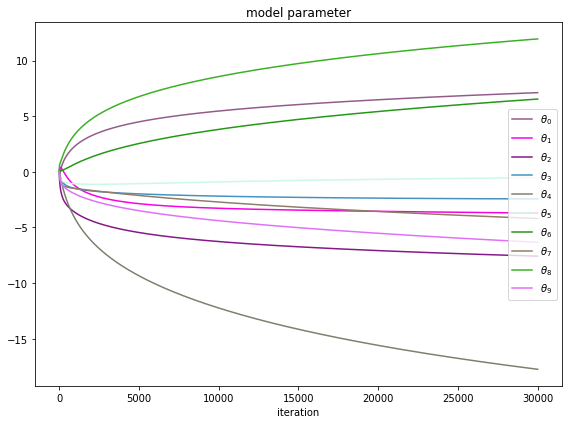

In [81]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

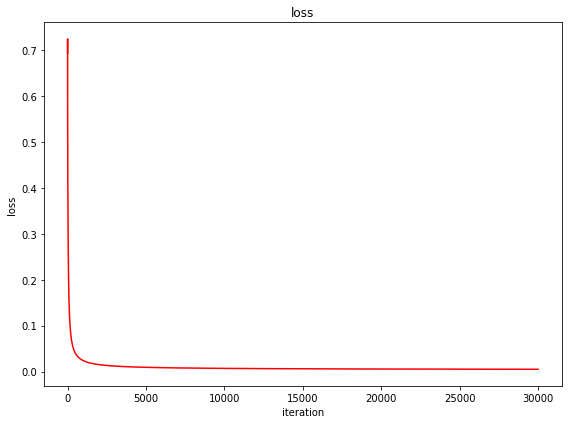

In [82]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

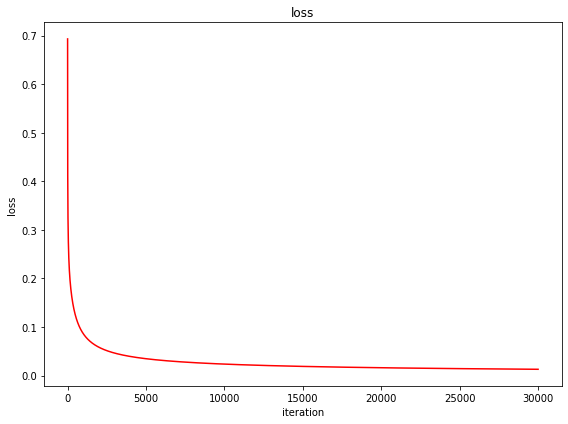

In [83]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

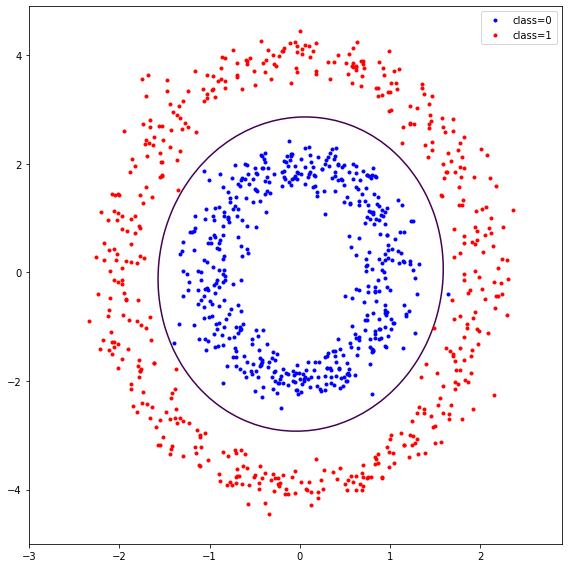

In [222]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

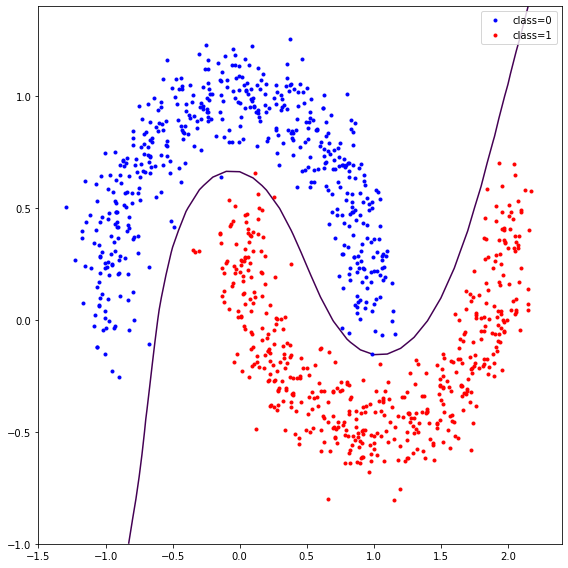

In [223]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [86]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [87]:
print(accuracy_classifier2)

0.997
